In [ ]:
import pandas as pd
import numpy as np
import pickle

from torch.autograd import Variable
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader


import torch.utils.data as data_utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42
LABELS = ["0", "1"]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/TML/Maternal Health Risk Data Set.csv')
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [ ]:
print(df.shape)
print(df.describe())

(1014, 7)
               Age   SystolicBP  DiastolicBP           BS     BodyTemp  \
count  1014.000000  1014.000000  1014.000000  1014.000000  1014.000000   
mean     29.871795   113.198225    76.460552     8.725986    98.665089   
std      13.474386    18.403913    13.885796     3.293532     1.371384   
min      10.000000    70.000000    49.000000     6.000000    98.000000   
25%      19.000000   100.000000    65.000000     6.900000    98.000000   
50%      26.000000   120.000000    80.000000     7.500000    98.000000   
75%      39.000000   120.000000    90.000000     8.000000    98.000000   
max      70.000000   160.000000   100.000000    19.000000   103.000000   

         HeartRate  
count  1014.000000  
mean     74.301775  
std       8.088702  
min       7.000000  
25%      70.000000  
50%      76.000000  
75%      80.000000  
max      90.000000  


In [ ]:
df.isnull().values.any()


False

In [ ]:
df['RiskLevel'].value_counts()

,count
RiskLevel,
low risk,406
mid risk,336
high risk,272


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Используем LabelEncoder для замены категориальных данных
le = LabelEncoder()
df["RiskLevel"] = le.fit_transform(df["RiskLevel"])
print(df)

      Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0      25         130           80  15.0      98.0         86          0
1      35         140           90  13.0      98.0         70          0
2      29          90           70   8.0     100.0         80          0
3      30         140           85   7.0      98.0         70          0
4      35         120           60   6.1      98.0         76          1
...   ...         ...          ...   ...       ...        ...        ...
1009   22         120           60  15.0      98.0         80          0
1010   55         120           90  18.0      98.0         60          0
1011   35          85           60  19.0      98.0         86          0
1012   43         120           90  18.0      98.0         70          0
1013   32         120           65   6.0     101.0         76          2

[1014 rows x 7 columns]


In [ ]:
df = df[df['RiskLevel'] != 2]

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE

X = df.drop('RiskLevel', axis=1)
y = df['RiskLevel']

from imblearn.under_sampling import RandomUnderSampler

# Инициализация RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)

# Применение undersampling
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Объединение обратно в DataFrame
df = pd.DataFrame(X_resampled, columns=X.columns)
df['RiskLevel'] = y_resampled

<ipython-input-598-c3b297667934>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(df['RiskLevel'], sort = True)


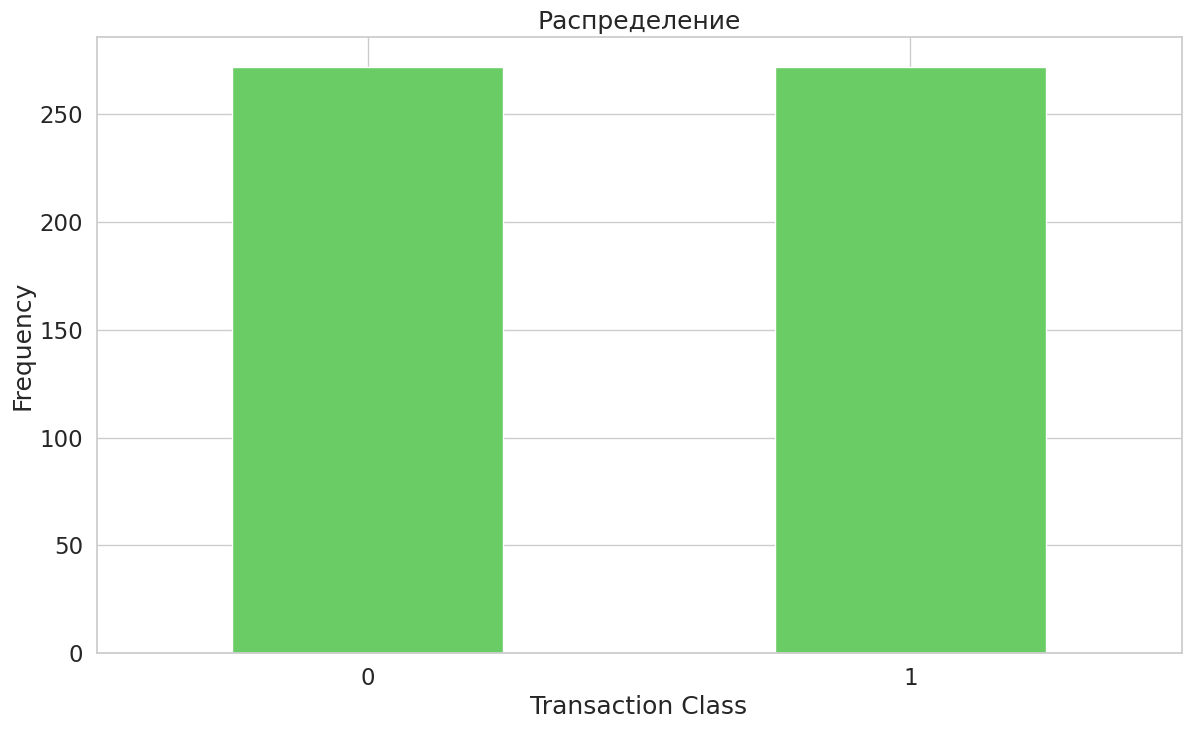

In [ ]:
count_classes = pd.value_counts(df['RiskLevel'], sort = True)
count_classes.plot(kind = 'bar', rot=0, color="g")
plt.title("Распределение")
plt.xticks(range(2), LABELS)
plt.xlabel("Transaction Class")
plt.ylabel("Frequency");

In [ ]:
fraudsDF = df[df.RiskLevel == 1]
normalDF = df[df.RiskLevel == 0]

In [ ]:
fraudsDF.shape

(272, 7)

In [ ]:
normalDF.shape

(272, 7)

In [ ]:
fraudsDF.RiskLevel.describe()

,RiskLevel
count,272.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [ ]:
normalDF.RiskLevel.describe()

,RiskLevel
count,272.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [ ]:
df['Age']=StandardScaler().fit_transform(df['Age'].values.reshape(-1, 1))

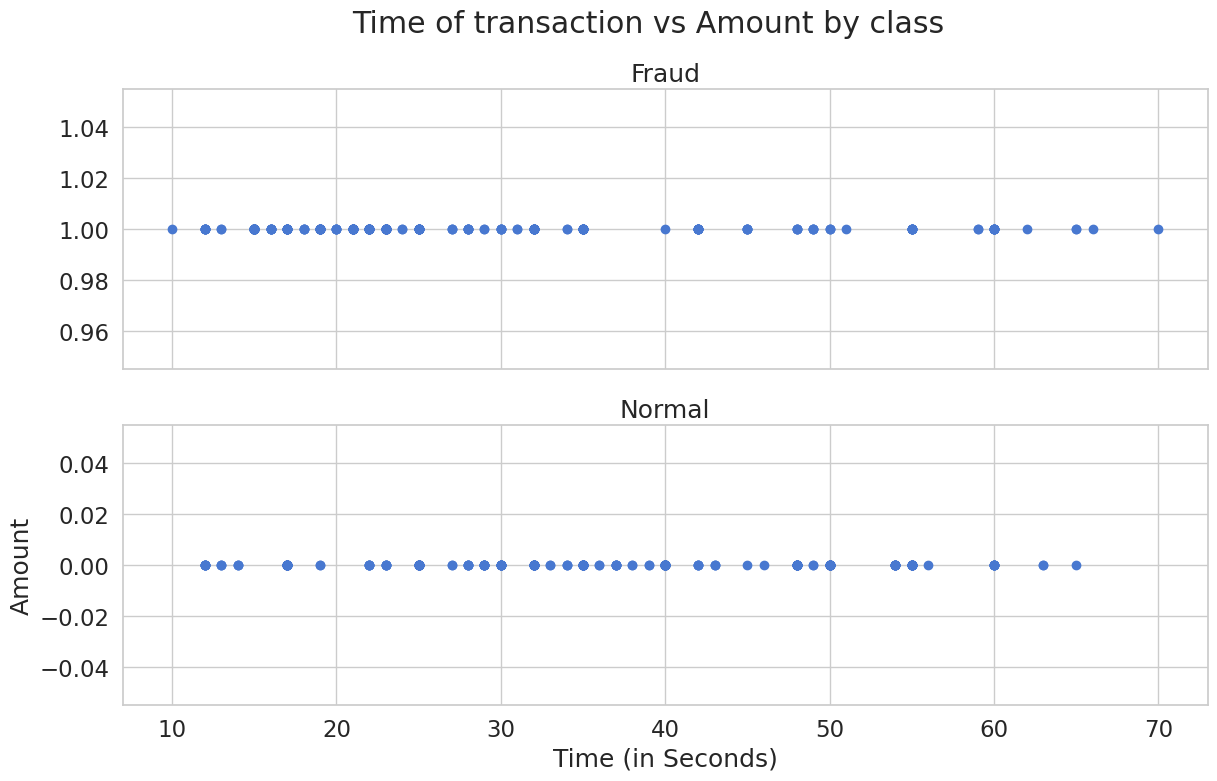

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(fraudsDF.Age, fraudsDF.RiskLevel)
ax1.set_title('Fraud')

ax2.scatter(normalDF.Age, normalDF.RiskLevel)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [ ]:
transactionData = df

In [ ]:
transactionData['Age'] = StandardScaler().fit_transform(transactionData['Age'].values.reshape(-1, 1))
transactionData['SystolicBP'] = StandardScaler().fit_transform(transactionData['SystolicBP'].values.reshape(-1, 1))
transactionData['DiastolicBP'] = StandardScaler().fit_transform(transactionData['DiastolicBP'].values.reshape(-1, 1))
transactionData['BodyTemp'] = StandardScaler().fit_transform(transactionData['BodyTemp'].values.reshape(-1, 1))
transactionData['HeartRate'] = StandardScaler().fit_transform(transactionData['HeartRate'].values.reshape(-1, 1))
transactionData['BS'] = StandardScaler().fit_transform(transactionData['BS'].values.reshape(-1, 1))

In [ ]:
X_train, X_test = train_test_split(df, test_size=0.2, random_state=RANDOM_SEED)
X_train = X_train[X_train.RiskLevel == 0]
X_train = X_train.drop(['RiskLevel'], axis=1)
#print(type(X_train))
y_test = X_test['RiskLevel']
X_test = X_test.drop(['RiskLevel'], axis=1)

X_train = X_train.values
#print(type(X_train))
X_test = X_test.values
y_test = y_test.values
print(y_test.size)

109


In [ ]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(6, 5),
            nn.Tanh(),
            nn.Linear(5, 4),
            nn.LeakyReLU(),
            )

        self.decoder = nn.Sequential(
           nn.Linear(4, 5),
           nn.Tanh(),
           nn.Linear(5, 6),
           nn.LeakyReLU()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [ ]:
model = Autoencoder().double()
#model = Autoencoder().double().cpu()

In [ ]:
num_epochs = 800   # сколько эпох будем обучать. Результаты обучения на одной эпохе используются как начальные для следующей.
minibatch_size = 32
learning_rate = 1e-3

In [ ]:
train_loader = data_utils.DataLoader(X_train, batch_size=minibatch_size, shuffle=True)


In [ ]:
#test = data_utils.TensorDataset(torch.from_numpy(X_test).double(),torch.from_numpy(y_test).double())
#test_loader = data_utils.DataLoader(test, batch_size=minibatch_size, shuffle=True)
test_loader = data_utils.DataLoader(X_test, batch_size=1, shuffle=False)

In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(
model.parameters(), lr=learning_rate, weight_decay=10e-05)


In [ ]:
history = {}
history['train_loss'] = []
history['test_loss'] = []


In [ ]:
for epoch in range(num_epochs):
    h = np.array([])
    for data in train_loader:
        #print(type(data))
        #data = Variable(data).cpu()
        #print(type(data))
        # ===================forward=====================
        output = model(data)
        loss = criterion(output, data)
        h = np.append(h, loss.item())

        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    mean_loss = np.mean(h)
    print('epoch [{}/{}], loss:{:.4f}'
          .format(epoch + 1, num_epochs, mean_loss))
    history['train_loss'].append(mean_loss)


torch.save(model.state_dict(), './credit_card_model.pth')

epoch [1/800], loss:1.1311
epoch [2/800], loss:1.1280
epoch [3/800], loss:1.1200
epoch [4/800], loss:1.1046
epoch [5/800], loss:1.1044
epoch [6/800], loss:1.0915
epoch [7/800], loss:1.0880
epoch [8/800], loss:1.0742
epoch [9/800], loss:1.0630
epoch [10/800], loss:1.0489
epoch [11/800], loss:1.0431
epoch [12/800], loss:1.0314
epoch [13/800], loss:1.0158
epoch [14/800], loss:1.0127
epoch [15/800], loss:0.9957
epoch [16/800], loss:0.9896
epoch [17/800], loss:0.9680
epoch [18/800], loss:0.9663
epoch [19/800], loss:0.9458
epoch [20/800], loss:0.9355
epoch [21/800], loss:0.9303
epoch [22/800], loss:0.9329
epoch [23/800], loss:0.9162
epoch [24/800], loss:0.9007
epoch [25/800], loss:0.8933
epoch [26/800], loss:0.8835
epoch [27/800], loss:0.8767
epoch [28/800], loss:0.8680
epoch [29/800], loss:0.8725
epoch [30/800], loss:0.8525
epoch [31/800], loss:0.8437
epoch [32/800], loss:0.8408
epoch [33/800], loss:0.8332
epoch [34/800], loss:0.8191
epoch [35/800], loss:0.8131
epoch [36/800], loss:0.8142
e

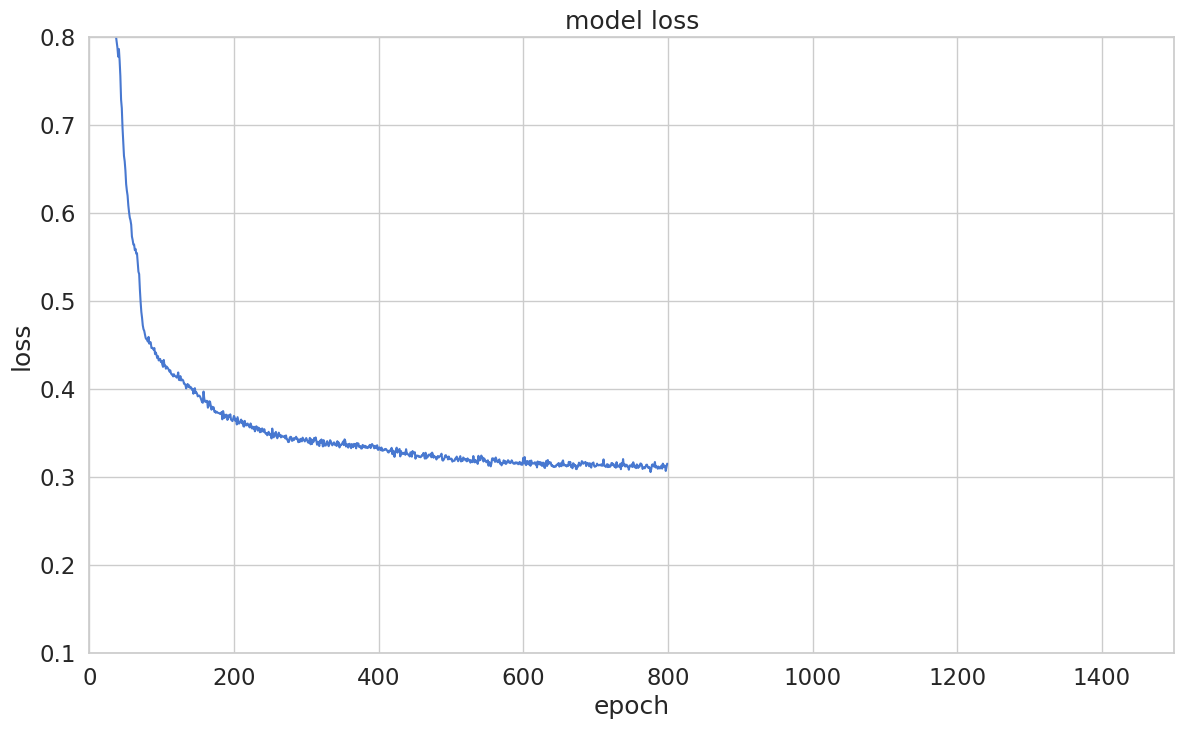

In [ ]:
#history['train_loss']
#plt.plot(range(num_epochs),history['train_loss'],'ro',linewidth=2.0)
plt.plot(history['train_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.axis([0,1500,0.10,0.80])
#plt.legend(['train', 'test'], loc='upper right');
plt.show()

In [ ]:
pred_losses = {'pred_loss' : []}
model.eval()
with torch.no_grad():
   # test_loss = 0
    for data in test_loader:
        inputs = data
        # print(inputs)
        outputs = model(inputs)
        loss = criterion(outputs, inputs).data.item()
        #print(loss)
        pred_losses['pred_loss'].append(loss)
        #pred_losses = model([y_test.size, y_test])
reconstructionErrorDF = pd.DataFrame(pred_losses)
reconstructionErrorDF['RiskLevel'] = y_test

In [ ]:
reconstructionErrorDF.describe()

,pred_loss,RiskLevel
count,109.000000,109.000000
mean,0.565765,0.486239
std,1.187560,0.502119
min,0.033661,0.000000
25%,0.111262,0.000000
50%,0.262929,0.000000
75%,0.610097,1.000000
max,11.661640,1.000000


In [ ]:
reconstructionErrorDF.describe()

,pred_loss,RiskLevel
count,109.000000,109.000000
mean,0.565765,0.486239
std,1.187560,0.502119
min,0.033661,0.000000
25%,0.111262,0.000000
50%,0.262929,0.000000
75%,0.610097,1.000000
max,11.661640,1.000000


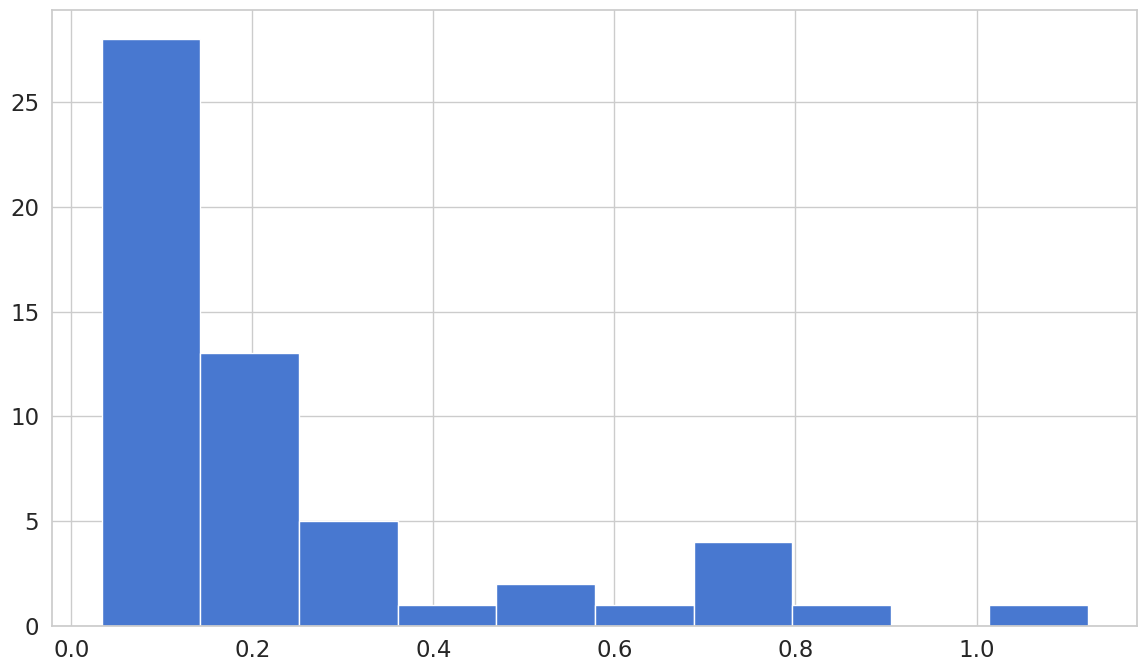

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
normal_error_df = reconstructionErrorDF[(reconstructionErrorDF['RiskLevel']== 0) & (reconstructionErrorDF['pred_loss'] < 10)]
_ = ax.hist(normal_error_df.pred_loss.values, bins=10)

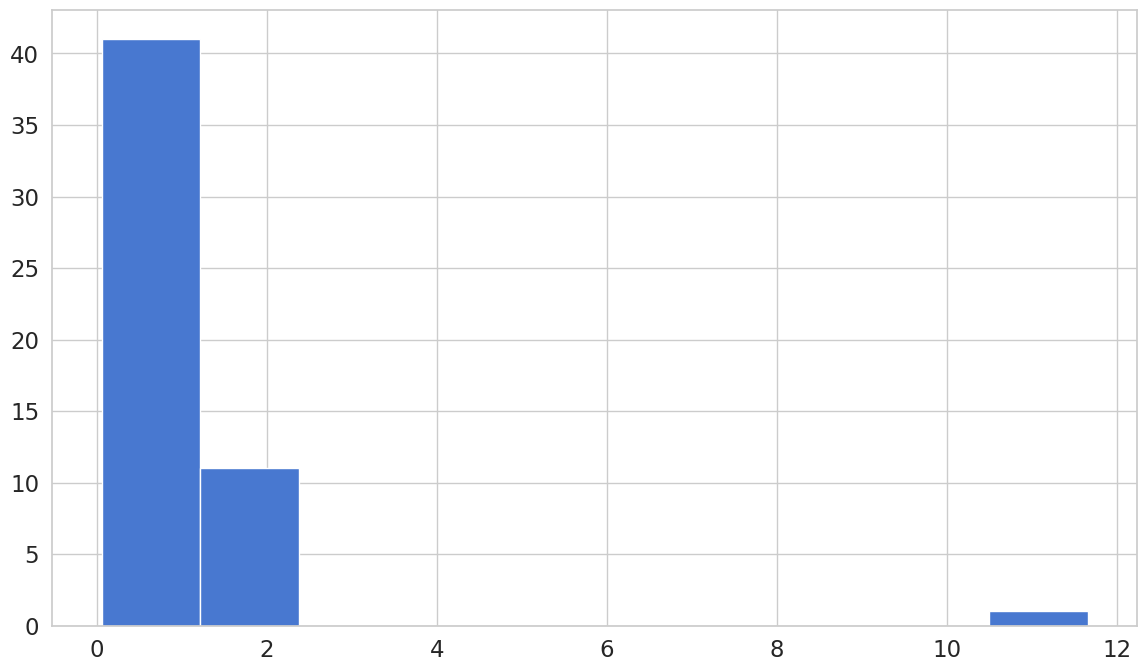

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
fraud_error_df = reconstructionErrorDF[(reconstructionErrorDF['RiskLevel']== 1) ]
_ = ax.hist(fraud_error_df.pred_loss.values, bins=10)

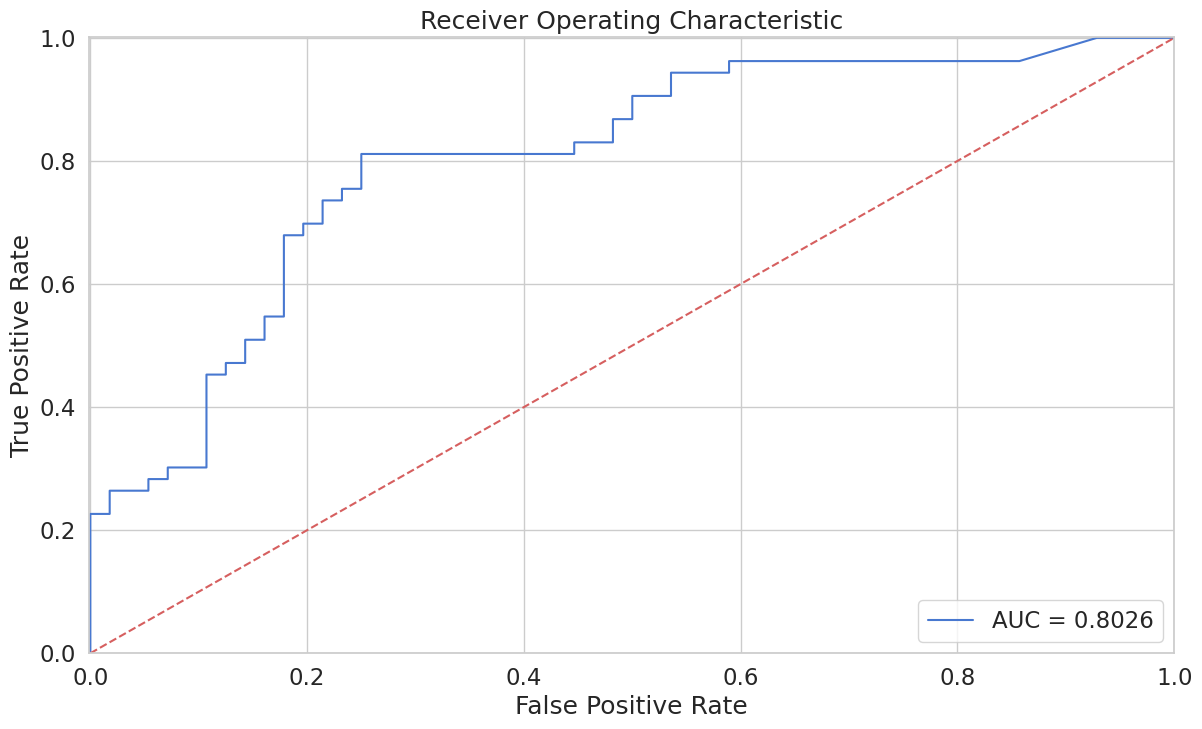

In [ ]:
fpr, tpr, thresholds = roc_curve(reconstructionErrorDF.RiskLevel, reconstructionErrorDF.pred_loss)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

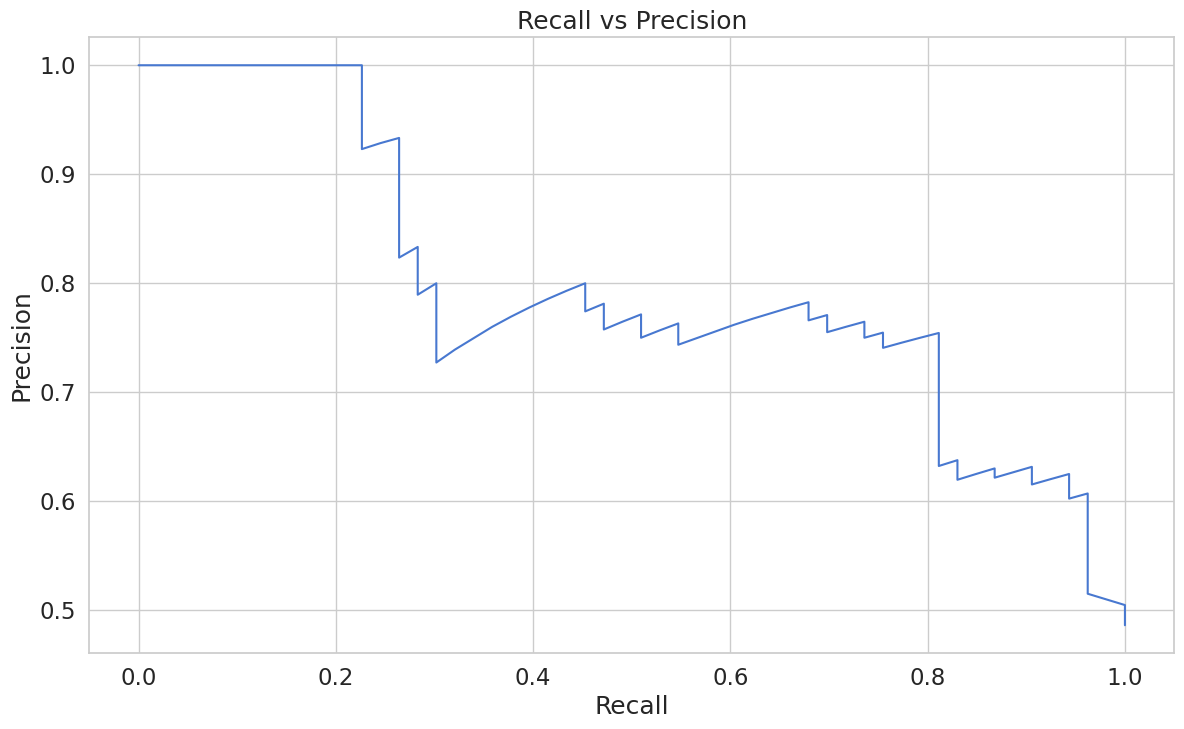

In [ ]:
precision, recall, th = precision_recall_curve(reconstructionErrorDF.RiskLevel, reconstructionErrorDF.pred_loss)
plt.plot(recall, precision, 'b', label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

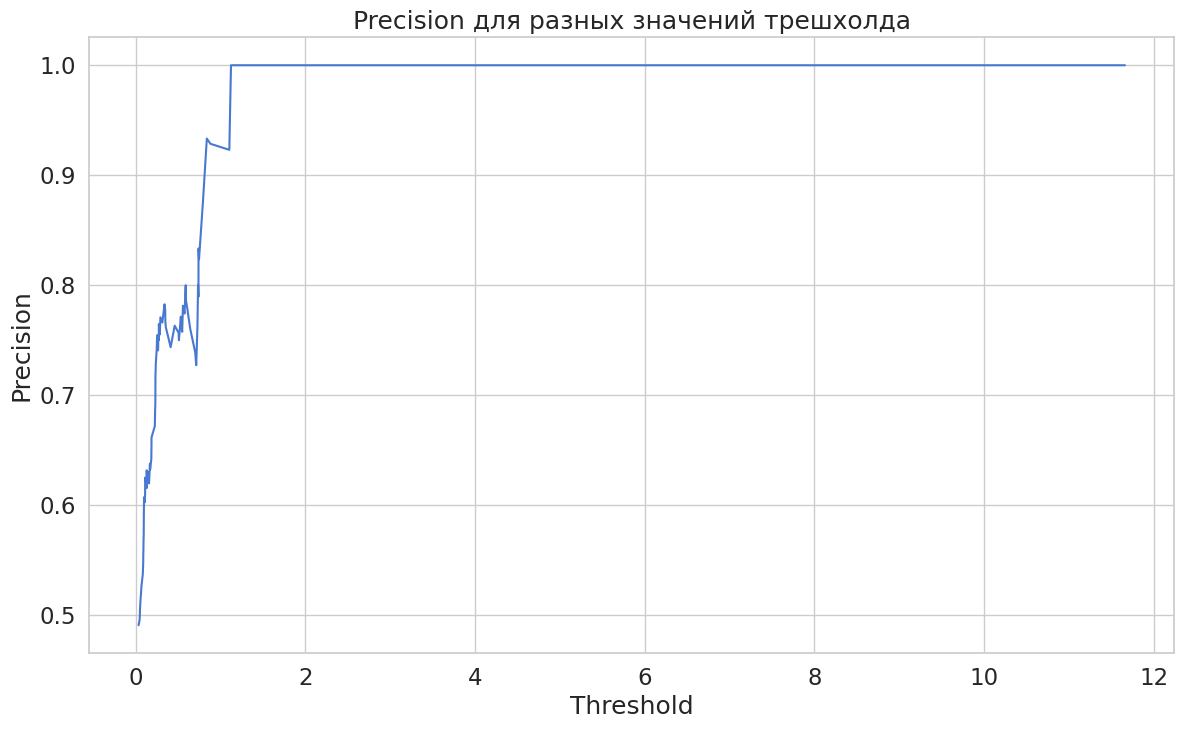

In [ ]:
plt.plot(th, precision[1:], 'b', label='Threshold-Precision curve')
plt.title('Precision для разных значений трешхолда')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.show()

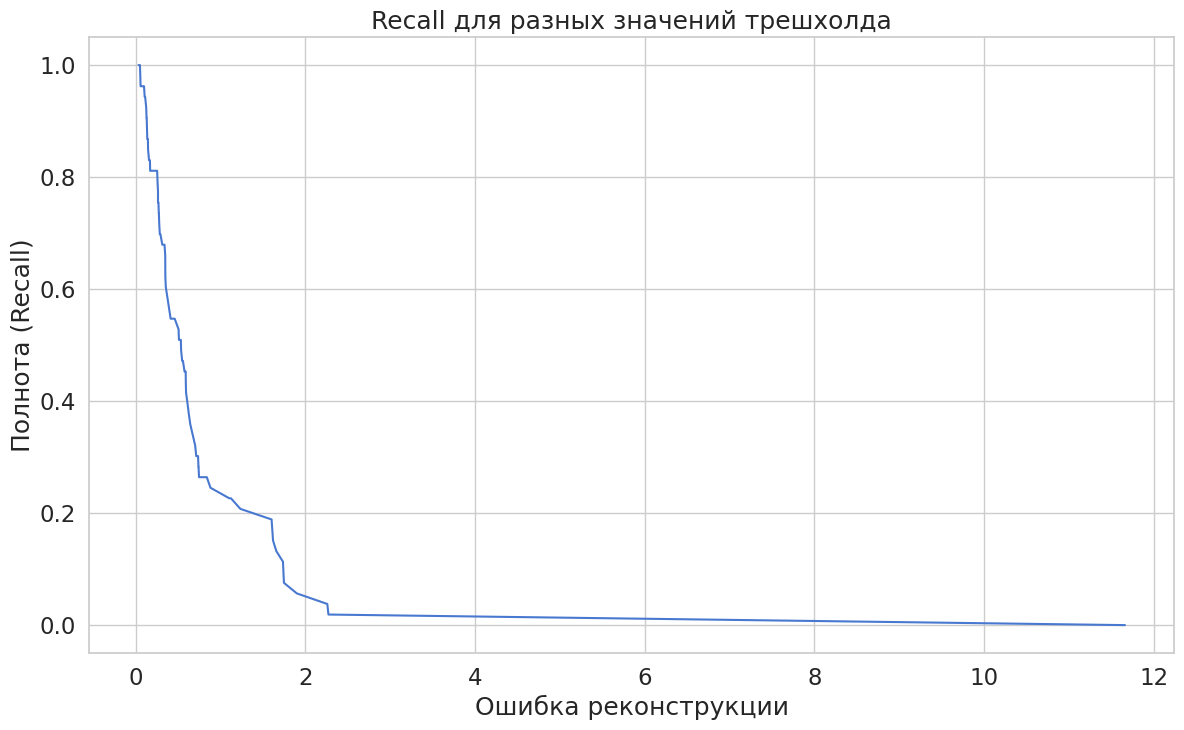

In [ ]:
plt.plot(th, recall[1:], 'b', label='Threshold-Recall curve')
plt.title('Recall для разных значений трешхолда')
plt.xlabel('Ошибка реконструкции')
plt.ylabel('Полнота (Recall)')
plt.show()

In [ ]:
threshold = 0.25

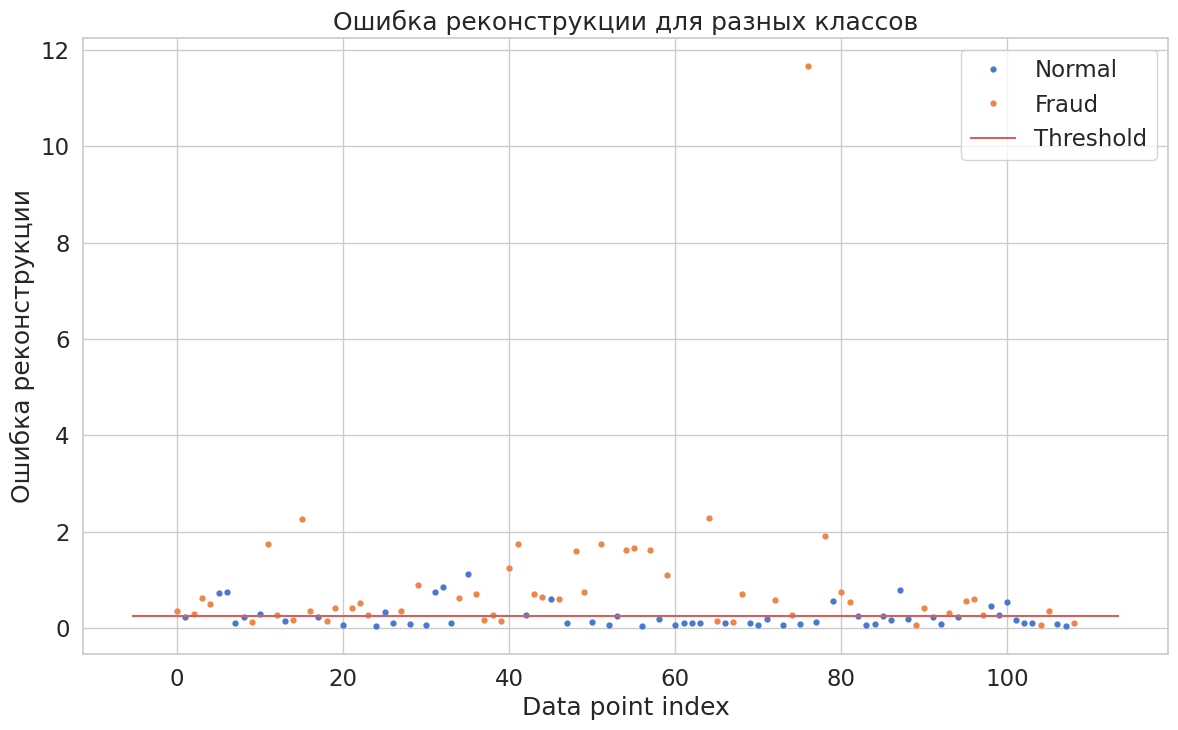

In [ ]:
groups = reconstructionErrorDF.groupby('RiskLevel')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.pred_loss, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Ошибка реконструкции для разных классов")
plt.ylabel("Ошибка реконструкции")
plt.xlabel("Data point index")
plt.show();

<ipython-input-630-724ae5be6e5d>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('Blues'));


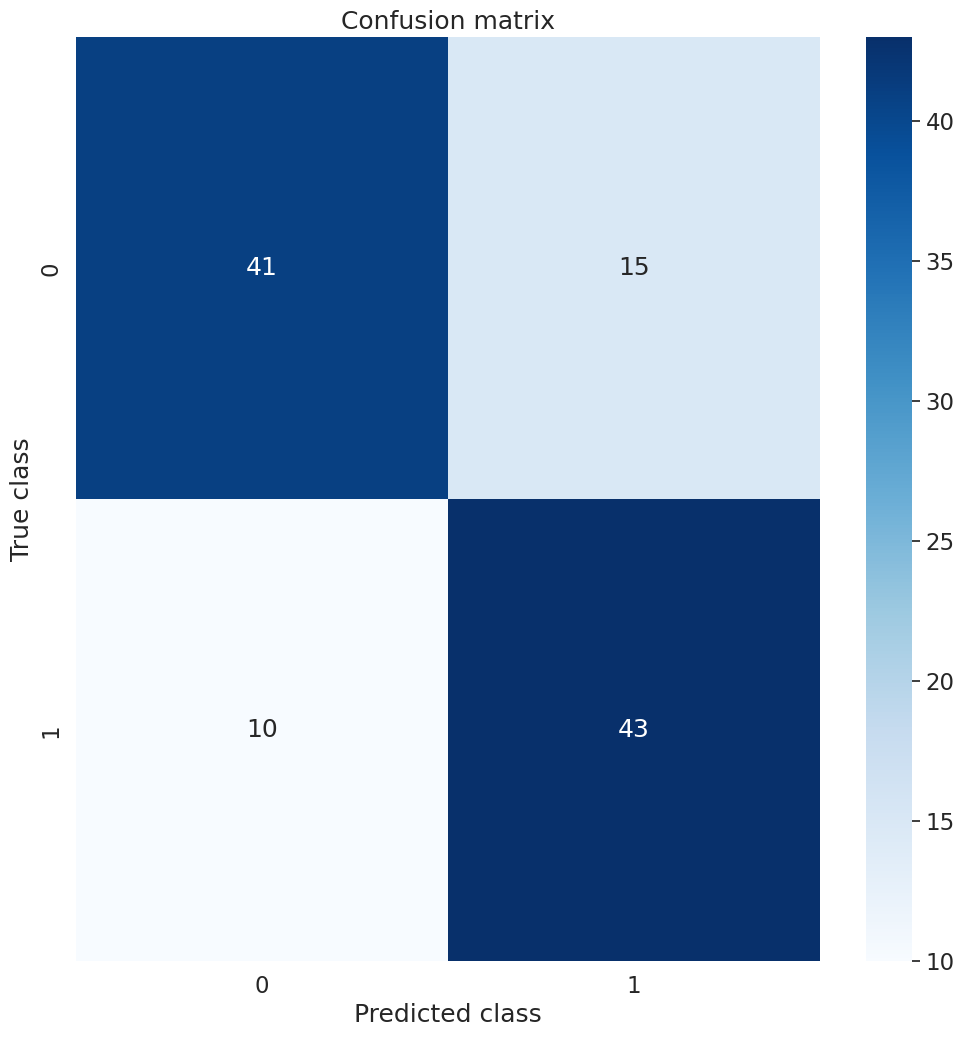

In [ ]:
y_pred = [1 if e > threshold else 0 for e in reconstructionErrorDF.pred_loss.values]
conf_matrix = confusion_matrix(reconstructionErrorDF.RiskLevel, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d",
            cmap=plt.cm.get_cmap('Blues'));
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()